# ML Assignment 03 <br> Machine Learning using neural network-based classifier

Problem Statement: <br>
Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Link to the Kaggle project: 
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.

Print the accuracy score and confusion matrix

# Importing required libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data['Geography'] = data['Geography'].replace(['France', 'Spain', 'Germany'], [1, 2, 3])

In [9]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

In [10]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Feature selection

In [11]:
X = data.drop(['CustomerId', 'Surname', 'RowNumber','Exited'], axis=1)
y = data['Exited']

In [12]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Normalization

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32622142, -0.9025865 , -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.301665  , -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.9025865 , -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.9025865 , -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  1.50591651,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.9025865 , -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Splitting data into training data and testing data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [15]:
X.shape

(10000, 10)

In [16]:
x_test.shape

(2500, 10)

In [17]:
x_train.shape

(7500, 10)

# Neural network

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100, activation='relu')

In [20]:
ann.fit(x_train, y_train)

C:\Users\ATHARV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [21]:
y_pred = ann.predict(x_test)

In [22]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [24]:
y_test.value_counts()

0    1991
1     509
Name: Exited, dtype: int64

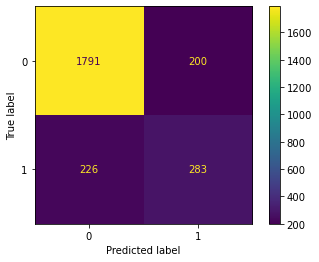

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [26]:
accuracy_score(y_test, y_pred)

0.8296

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1991
           1       0.59      0.56      0.57       509

    accuracy                           0.83      2500
   macro avg       0.74      0.73      0.73      2500
weighted avg       0.83      0.83      0.83      2500



Dataset is imbalanced (difference between entries of 0 and 1 in Exited is a high (7963:2037) ) <br>
Hence we need to balance the dataset in order to improve the results

# Improvement

In [28]:
# !pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [30]:
x_res, y_res = ros.fit_resample(X,y)

In [31]:
y_res.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [32]:
x_res = scaler.fit_transform(x_res)
x_res

array([[-0.29877723, -0.97539862, -1.01799435, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 ,  0.18257368, -1.01799435, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169, -0.97539862, -1.01799435, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.34054598,  0.98232373, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.18257368, -1.01799435, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 , -0.97539862, -1.01799435, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state=0, test_size=0.25)

In [34]:
x_res.shape

(15926, 10)

In [35]:
y_res.shape

(15926,)

In [43]:
ann.fit(x_train, y_train)

C:\Users\ATHARV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [44]:
y_pred = ann.predict(x_test)

In [45]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
y_test.value_counts()

1    2001
0    1981
Name: Exited, dtype: int64

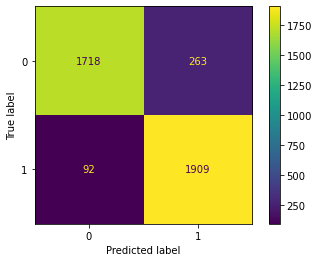

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1981
           1       0.88      0.95      0.91      2001

    accuracy                           0.91      3982
   macro avg       0.91      0.91      0.91      3982
weighted avg       0.91      0.91      0.91      3982

